In [141]:
import tweepy
import pandas as pd
import re
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [150]:
articles_df = pd.read_csv("data.csv")
articles_df.reset_index(inplace=True, drop=True)

In [152]:
articles_df.columns = ['ArticleName', 'Summary', 'Link']

In [144]:
def clean_text(text):
    text = re.sub(r"@[A-Za-z0-9]+", '', text)
    text = re.sub(r"#", '', text)
    text = re.sub(r"\\", '', text)
    text = re.sub(r"\n", '', text)
    text = re.sub(r"RT[\s]+", "", text)
    text = re.sub(r"https?:\/\/\s+", '', text)  
    text = re.sub(r"(?:^|\W)crypto(?:$|\W)", '', text)
    text = re.sub(r"(?:^|\W)nft(?:$|\W)", '', text)
    text = re.sub(r"(?:^|\W)meta(?:$|\W)", '', text)
    text = re.sub(r"(?:^|\W)https(?:$|\W)", '', text)
    text = re.sub(r"(?:^|\W)t co(?:$|\W)", '', text)
    text = re.sub(r"(?:^|\W)facebook(?:$|\W)", '', text)
    text = re.sub(r"\\", '', text)
    return text

In [145]:
def more_cleaning(tweet, lst_of_words):
    for word in lst_of_words:
        if word in tweet:
            tweet = tweet.replace(word, "")
    return tweet

In [146]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getAPolarity(text):
    return TextBlob(text).sentiment.polarity

In [147]:
def remove_stopwords(tweet):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(tweet)
    filtered_tokens = []
    
    for word in word_tokens:
        if word.lower() not in stop_words:
            filtered_tokens.append(word)
            
    return " ".join(filtered_tokens)

In [148]:
def create_wordscloud(tweets, title):
    plt.title(title)
    allWords = " ".join([twt for twt in tweets])
    wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [154]:
def remove_polish_entries(text, df, col_name):
    if "się" in text:
        ind = df.index[df[col_name] == text]
        df.drop(axis=0, index=ind[0], inplace=True)
        
        

In [155]:
articles_df.dropna(inplace=True)
articles_df.reset_index(inplace=True, drop = True)
len(articles_df)

141

In [156]:
articles_df["ArticleName"] = articles_df["ArticleName"].apply(clean_text)
articles_df["Summary"] = articles_df["Summary"].apply(clean_text)
articles_df["Summary"].apply(lambda x:remove_polish_entries(x, articles_df, "Summary"))

0      None
1      None
2      None
3      None
4      None
       ... 
136    None
137    None
138    None
139    None
140    None
Name: Summary, Length: 141, dtype: object

In [157]:
len(articles_df)

127

In [158]:
articles_df["Subjectivity"] = articles_df["Summary"].apply(getSubjectivity)
articles_df["Polarity"] = articles_df["Summary"].apply(getAPolarity)


In [175]:
articles_df["Summary"] = articles_df["Summary"].apply(lambda x: more_cleaning(x, ["said", "metaverse", "Facebook", "Meta", "Zuckerberg", " s ", " n't ", "social media", "social network"]))

In [160]:
articles_df.columns

Index(['ArticleName', 'Summary', 'Link', 'Subjectivity', 'Polarity'], dtype='object')

In [161]:
articles_df

,ArticleName,Summary,Link,Subjectivity,Polarity
0,Opinion | Meta is last ditch effort to save Fa...,Is Last Ditch Effort To Save Amid privacy sca...,https://dailyillini.com/opinions-stories/2021/...,0.342222,0.111111
1,"Meta — different name, same mess | Opinion | D...","Different Name, Same MessYou have to hand it t...",https://www.dw.com/en/opinion-meta-different-n...,0.489901,0.032271
2,Americans Don't Like 'Meta' Name Or Care About...,Americans Don'T Like '' Name Or Care About 'S ...,https://morningconsult.com/2021/11/02/meta-fac...,0.339471,0.068906
3,Metaverse? Are You Kidding Me?! - The New York...,"""Mr. painted a picture of the as a clean, we...",https://www.nytimes.com/2021/10/31/opinion/met...,0.485937,0.332812
4,"Opinion | Goodbye, Facebook. Welcome to the Me...","Goodbye, . Welcome To The Zone.It is an area ...",https://www.washingtonpost.com/opinions/2021/1...,0.466763,0.065488
...,...,...,...,...,...
134,Facebook patents show Meta wants to track your...,META PLATFORMS AKTIE RatingWie bewerten Sie di...,https://www.finanzen.net/aktien/rating/facebook,0.000000,0.000000
135,META PLATFORMS (EX FACEBOOK) AKTIE Rating,How 'S New '' Branding Began With A 2017 Websi...,https://rifnote.com/2021/10/31/how-facebooks-n...,0.330429,0.107323
138,Meta zastąpi Facebooka - o co chodzi? - ESKA.pl,'' Is The New Name For has long been one of t...,https://screenrant.com/facebook-name-change-me...,0.388684,0.080303
139,Jak używać metatagu „og” (Open Graph) do udost...,"Jak Używać tagu „Og"" Do Udostępniania Na uJak ...",https://qa-stack.pl/programming/11616697/how-t...,0.500000,0.000000


In [178]:
# Removing Stopwords
articles_df["Summary"] = articles_df["Summary"].apply(remove_stopwords)


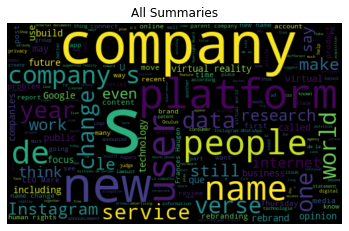

In [179]:
# Creating Wordcloud
create_wordscloud(articles_df["Summary"], "All Summaries")

In [164]:
def tweetPositivity(score):
    if score > 0:
        return "Positive"
    if score == 0:
        return "Neutral"
    if score < 0:
        return "Negative"

In [165]:
articles_df["Analysis"] = articles_df["Polarity"].apply(tweetPositivity)

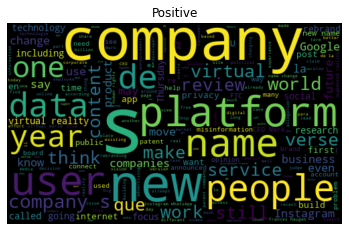

In [180]:
create_wordscloud(articles_df[articles_df["Analysis"] == "Positive"]["Summary"], "Positive")

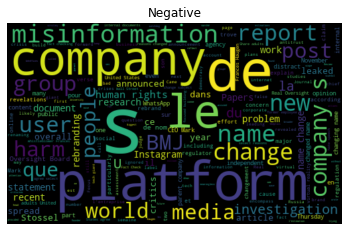

In [181]:
create_wordscloud(articles_df[articles_df["Analysis"] == "Negative"]["Summary"], "Negative")

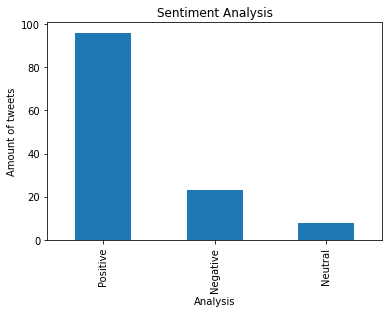

In [182]:
plt.title("Sentiment Analysis for 'Meta Fa')
plt.xlabel("Analysis")
plt.ylabel("Amount of tweets")
articles_df["Analysis"].value_counts().plot(kind="bar")
plt.show()